In [1]:
import pickle
import numpy as np
from random import shuffle
from agent_code.my_agent.algorithms import *
from settings import s
import time
import matplotlib.pyplot as plt
import copy
import os

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def q_gd_linapprox(next_state, prev_state_a, reward, weights, alpha, gamma):
    next_state_a = next_state[np.argmax(np.dot(next_state, weights)), :]
    weights += alpha * (reward + gamma * np.dot(next_state_a,weights) - 
                        np.dot(prev_state_a,weights)) * prev_state_a 
    return weights

In [6]:
def train_game(data, weights, alpha, gamma):
    for i in range(len(data)-1):
        prev_state = data[i]['state']
        prev_action = data[i]['action']
        next_state = data[i+1]['state']
        next_action = data[i+1]['action']
        
        reward = -1
        
        if data[i]['state']['step'] != 1:
            for event in data[i]['events']:
                if event == e.BOMB_DROPPED:
                    reward += 1
                elif event == e.COIN_COLLECTED:
                    reward += 100
                elif event == e.KILLED_SELF:
                    reward -= 100
                elif event == e.CRATE_DESTROYED:
                    reward += 10
                elif event == e.COIN_FOUND:
                    reward += 30
                elif event == e.KILLED_OPPONENT:
                    reward += 300
                elif event == e.GOT_KILLED:
                    reward -= 300
                elif event == e.SURVIVED_ROUND:
                    reward += 100
                elif event == e.INVALID_ACTION:
                    reward -= 2


                
        
        f0 = np.ones(6)  # for bias
        f1 = feature1(next_state) # reward good action
        f2 = feature2(next_state) # penalization bad action
        f3 = feature3(next_state)
        f4 = feature4(next_state) # reward good action
        f5 = feature5(next_state)  # penalize bad action
        f6 = feature6(next_state)  # reward good action
        f7 = feature7(next_state) # reward action
        #f8 = feature8(next_state) # rewards good action
        f9 = feature9(next_state) # rewards good action
        f10 = feature10(next_state) # rewards good action
        f11 = feature11(next_state)
        f12 = feature12(next_state)
        f13 = feature13(next_state)
        f14 = feature14(next_state)
        f15 = feature15(next_state)
        next_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
          
        f0 = np.ones(6)  # for bias
        f1 = feature1(prev_state) # reward good action
        f2 = feature2(prev_state) # penalization bad action
        f3 = feature3(prev_state)
        f4 = feature4(prev_state) # reward good action
        f5 = feature5(prev_state)  # penalize bad action
        f6 = feature6(prev_state)  # reward good action
        f7 = feature7(prev_state) # reward action
        #f8 = feature8(prev_state) # rewards good action
        f9 = feature9(prev_state) # rewards good action
        f10 = feature10(prev_state) # rewards good action
        f11 = feature11(prev_state)
        f12 = feature12(prev_state)
        f13 = feature13(prev_state)
        f14 = feature14(prev_state)
        f15 = feature15(prev_state)
        prev_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
        prev_sa = prev_state[s.actions.index(prev_action),:]
        
        new_weights = q_gd_linapprox(next_state, prev_sa, reward, 
                                     weights, alpha, gamma)
        weights = new_weights
        
        alpha = 1/data[i]['state']['step']
        #gamma = gamma**data[i]['state']['step']
        
    return weights
        
        
        
        

In [9]:
alpha = 0.2
gamma = 0.95
weights1 = np.ones(15)
for file in os.listdir('data-collect'):
   if file.__contains__('game_'):
        print(file)
        f = open('data-collect/'+file, 'rb')
        data = sorted(pickle.load(f), key = lambda k: k['state']['step'])
        weights1 = train_game(data, weights, alpha, gamma)
        
        

game_1.pickle
game_10.pickle
game_100.pickle
game_101.pickle
game_102.pickle
game_103.pickle
game_104.pickle
game_105.pickle
game_106.pickle
game_107.pickle
game_108.pickle
game_109.pickle
game_11.pickle
game_110.pickle
game_111.pickle
game_112.pickle
game_113.pickle
game_114.pickle
game_115.pickle
game_116.pickle
game_117.pickle
game_118.pickle
game_119.pickle
game_12.pickle
game_120.pickle
game_121.pickle
game_122.pickle
game_123.pickle
game_124.pickle
game_125.pickle
game_126.pickle
game_127.pickle
game_128.pickle
game_129.pickle
game_13.pickle
game_130.pickle
game_131.pickle
game_132.pickle
game_133.pickle
game_134.pickle
game_135.pickle
game_136.pickle
game_137.pickle
game_138.pickle
game_139.pickle
game_14.pickle
game_140.pickle
game_141.pickle
game_142.pickle
game_143.pickle
game_144.pickle
game_145.pickle
game_146.pickle
game_147.pickle
game_148.pickle
game_149.pickle
game_15.pickle
game_150.pickle
game_151.pickle
game_152.pickle
game_153.pickle
game_154.pickle
game_155.pickle


In [11]:
print(weights, weights1)
np.save('init_weights_saG1.npy', weights)
np.save('init_weights_saG095.npy', weights1)

[6.62196614e+46 3.22872152e+45 1.53841009e+44 3.03857012e+45
 1.91389209e+45 1.28624852e+46 6.75354574e+44 1.00000000e+00
 5.98357380e+45 3.77314827e+45 1.00000000e+00 1.00000000e+00
 1.11376261e+42 8.50522179e+43 6.03272928e+45] [153.63913392   0.49778512  11.73402458   0.48082935  -1.32085402
  -4.38285574   3.05422061   1.           0.83304864   0.50406013
   1.           1.          -1.43942217  -6.36526537  -4.01966927]


In [47]:
x = np.load('train_weights_init1_GreedA02Y095.npy')
x = x.reshape(1517, 15)
i = np.arange(1517)
print(x[:,1])

[0.79469624 0.79469624 0.79469624 ... 3.11729187 3.11729187 3.11729187]


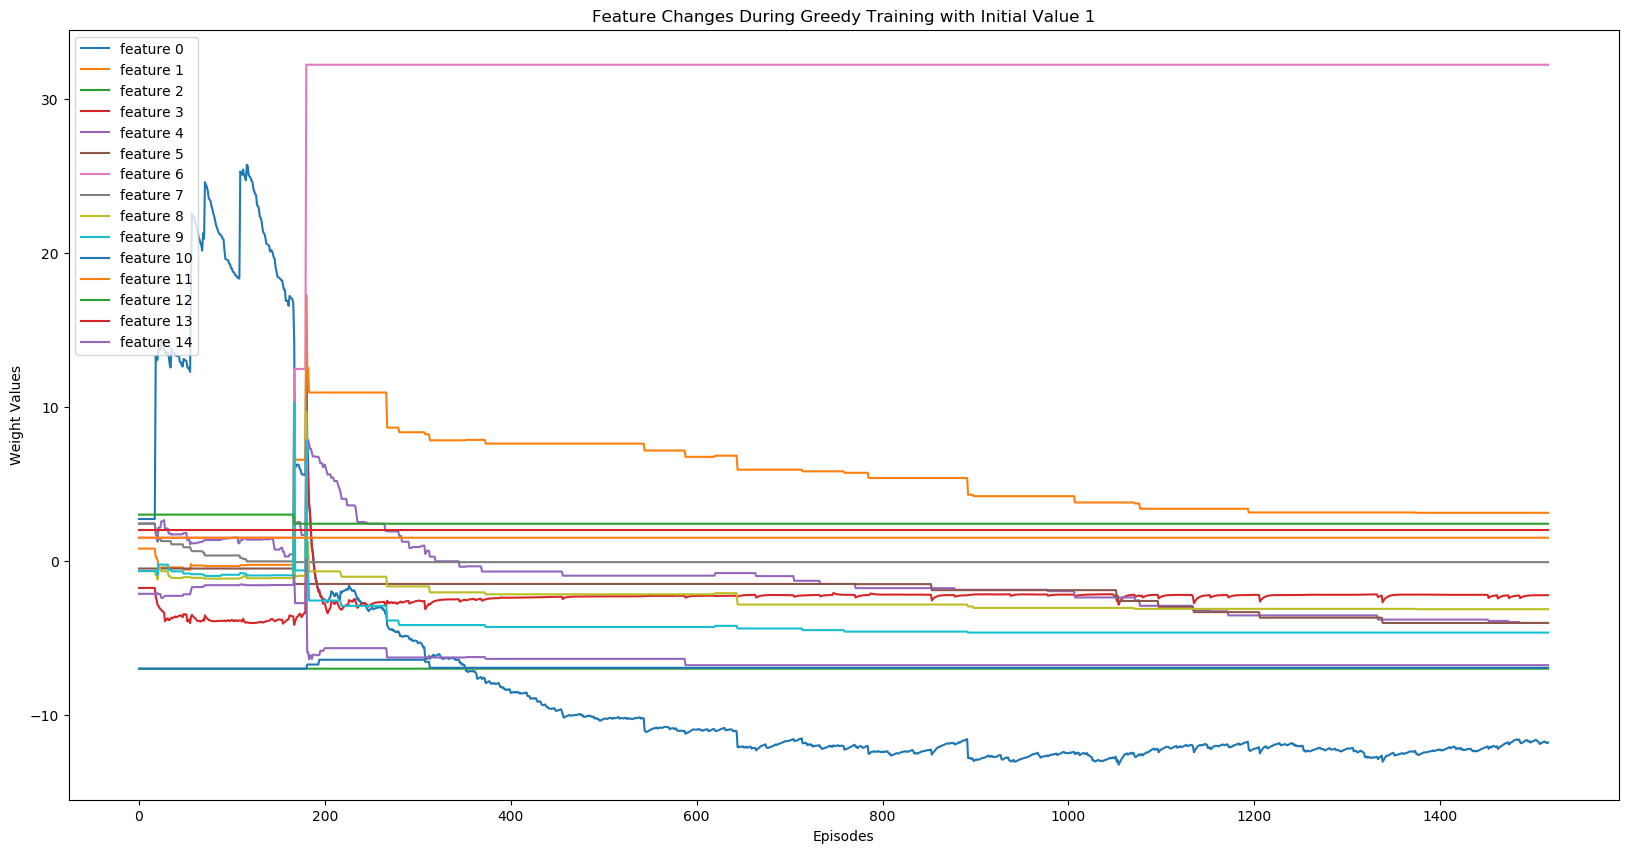

In [49]:
jtplot.reset()
plt.figure(figsize=(20, 10))
for feat in range(15):
    plt.plot(i, x[:,feat], label='feature {}'.format(feat))

plt.title('Feature Changes During Greedy Training with Initial Value 1')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()